                                 **Clustering-Employee Segmentation on Absenteesim**

# **PROJECT-Clustering - Employee Segmentation on Absenteesim**

---



### Project Description:

***The objective of this project is to perform employee segmentation using clustering techniques based on their absenteeism patterns. Employee absenteeism is a common problem in many organizations and can have a significant impact on productivity and profitability. In this project, we will analyze employee absenteeism patterns and cluster them into different groups based on their similar characteristics.***



*The first step in this project is to collect data on employee absenteeism patterns. This data can be obtained from employee records or HR systems and should include information such as the number of days absent, the reasons for absence, and the duration of absence.*



*Once the data has been collected, it will need to be pre-processed and cleaned to remove any missing or irrelevant information. Then, clustering algorithms such as k-means, hierarchical clustering, or DBSCAN can be used to segment employees into different groups based on their absenteeism patterns.*



*The performance of the clustering model can be evaluated using various metrics such as silhouette score, elbow method, or dendrogram. Once the model has been evaluated and optimized, the results can be visualized using graphs or heatmaps to understand the different employee segments and their absenteeism patterns.*



*Finally, the insights gained from employee segmentation can be used to develop targeted interventions to reduce employee absenteeism and improve productivity. This can include measures such as flexible work arrangements, employee wellness programs, or improved communication and feedback mechanisms.*



***Overall, the goal of this project is to use clustering techniques to segment employees based on their absenteeism patterns and provide insights that can help organizations to reduce absenteeism and improve employee productivity.***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn  import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/MiniProject on clustering/DS3_C6_S3_Clustering_AbsenteeismAtWork_Data_Project.csv',sep=';')

In [ ]:
df.columns.values.tolist()

['ID',
 'Reason for absence',
 'Month of absence',
 'Day of the week',
 'Seasons',
 'Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Hit target',
 'Disciplinary failure',
 'Education',
 'Son',
 'Social drinker',
 'Social smoker',
 'Pet',
 'Weight',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

In [ ]:
df.shape

(740, 21)

# **Summerise the data**

In [ ]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


* we can obserev the average Absenteeism time in hours of every employee is --6.92
* we can see the  average BMI of every employee is --- 26.7
* we cans see in the above data the average month of absence of every employee-- 6.23
* we can see in the data the average Distance from Residence to work is --- 29.63
* we can see the average transportation expense of every employee is--- 221.32
* we can see the minimum  transportation expense of every employee is --- 118.0
                    
* we can observe the minimum distance from teh residence to work is --5.00
* we can  see the average age of  employees--- 36
* we can see the  minimum age of employees--- 27
* we can see the maximum age of employees---  58


# Data Information

In [ ]:
df.drop(columns=['ID'],inplace=True,axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reason for absence               740 non-null    int64  
 1   Month of absence                 740 non-null    int64  
 2   Day of the week                  740 non-null    int64  
 3   Seasons                          740 non-null    int64  
 4   Transportation expense           740 non-null    int64  
 5   Distance from Residence to Work  740 non-null    int64  
 6   Service time                     740 non-null    int64  
 7   Age                              740 non-null    int64  
 8   Work load Average/day            740 non-null    float64
 9   Hit target                       740 non-null    int64  
 10  Disciplinary failure             740 non-null    int64  
 11  Education                        740 non-null    int64  
 12  Son                   

# **Checking the Missing values**

In [ ]:
df.isnull().sum()/df.shape[0]

Reason for absence                 0.0
Month of absence                   0.0
Day of the week                    0.0
Seasons                            0.0
Transportation expense             0.0
Distance from Residence to Work    0.0
Service time                       0.0
Age                                0.0
Work load Average/day              0.0
Hit target                         0.0
Disciplinary failure               0.0
Education                          0.0
Son                                0.0
Social drinker                     0.0
Social smoker                      0.0
Pet                                0.0
Weight                             0.0
Height                             0.0
Body mass index                    0.0
Absenteeism time in hours          0.0
dtype: float64

**we can observe the data there is no missing values in the data**

# **checking the noise in the data**

In [ ]:
numerical_data=df.select_dtypes(include=[np.number])
for i in list(numerical_data):
  print(df[i].value_counts())
  print('-------------------------')

23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
21      6
8       6
9       4
5       3
16      3
24      3
15      2
4       2
3       1
2       1
17      1
Name: Reason for absence, dtype: int64
-------------------------
3     87
2     72
10    71
7     67
5     64
11    63
8     54
6     54
9     53
4     53
1     50
12    49
0      3
Name: Month of absence, dtype: int64
-------------------------
2    161
4    156
3    154
6    144
5    125
Name: Day of the week, dtype: int64
-------------------------
4    195
2    192
3    183
1    170
Name: Seasons, dtype: int64
-------------------------
179    180
118     92
225     81
235     58
289     45
260     42
291     40
246     30
155     29
361     24
248     24
330     16
369     15
228      8
189      8
378      8
157      7
184      7
233      7
279      6
300      5
388      3
268      3
231      2
Name: Transpor

**we can observe the above data there is no Noise in the data**

# **Exploratry data analysis**

**Visulization**

In [ ]:
df

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8
736,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4
737,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
738,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0


In [ ]:
corr=df.corr()

In [ ]:
rank=pd.DataFrame(corr['Absenteeism time in hours']).reset_index()
rank.sort_values(by='Absenteeism time in hours',ascending=False,inplace=True)
rank

,index,Absenteeism time in hours
19,Absenteeism time in hours,1.000000
17,Height,0.144420
12,Son,0.113756
7,Age,0.065760
13,Social drinker,0.065067
4,Transportation expense,0.027585
9,Hit target,0.026695
8,Work load Average/day,0.024749
1,Month of absence,0.024345
6,Service time,0.019029


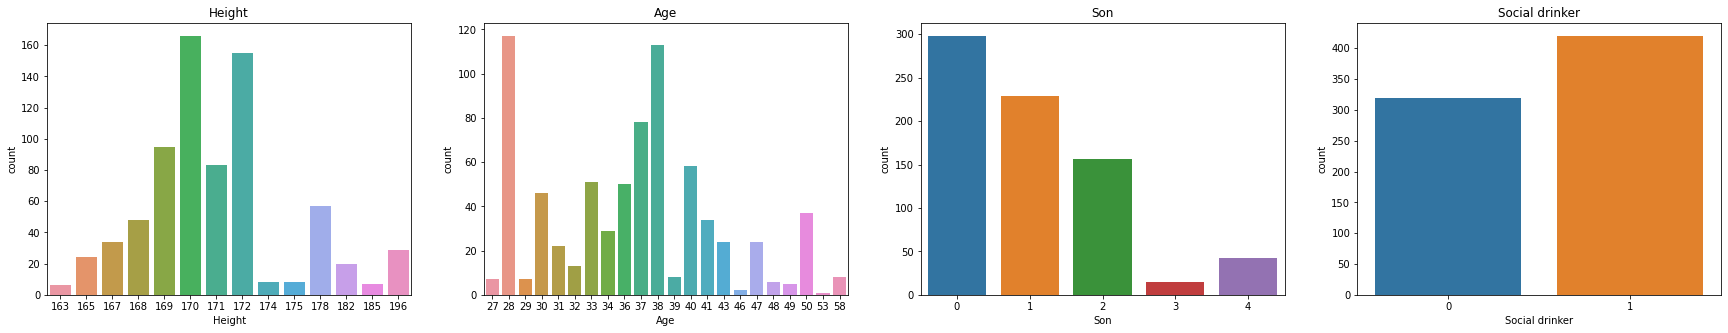

In [ ]:
plt.figure(figsize=(30,5))
plt.subplot(141)
sb.countplot(data=df,x='Height')
plt.title("Height")

plt.subplot(142)
sb.countplot(data=df,x='Age')
plt.title("Age")

plt.subplot(143)
sb.countplot(data=df,x='Son')
plt.title("Son")

plt.subplot(144)
sb.countplot(data=df,x='Social drinker')
plt.title('Social drinker')
plt.show()

*  we can see height graph the employees whoes height is --- 170cm,172cm are more members in the Organization

* we can see in the Age graph the Employees whose Age is  28 & 38 years old are more members in the Organization

* we can see the Sons graph  employees who are No(0) sons are more employees and followed by 1 son   and 2 sons of the employees

* we can see in the social drinker the employees who are drinking they are in High count amoung the Non social drinkers

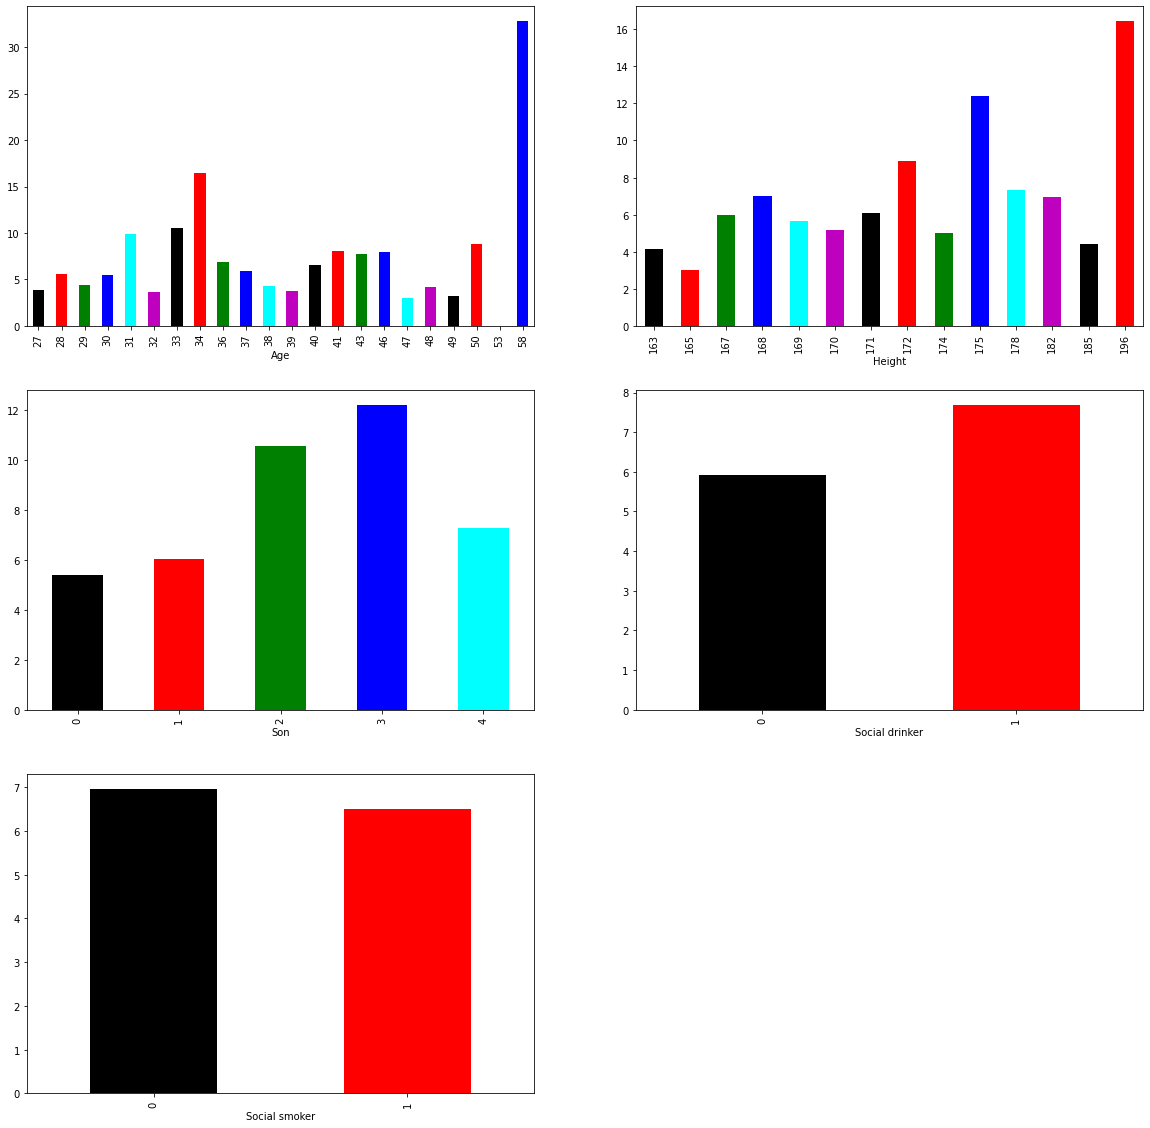

In [ ]:
cat_column2= ['Age', 'Height', 'Son', 'Social drinker','Social smoker']
plt.subplots(figsize=(20, 20))
for i, col in enumerate(cat_column2):
    plt.subplot(3, 2, i + 1)
    df.groupby(col).mean()['Absenteeism time in hours'].plot.bar(color=['black', 'red', 'green', 'blue', 'cyan','m'])
plt.show()

* we can see in the above graph **Age** vs **Absenteeism time in hours**  
  * The Employees whoes age--58 is having the highest Absenteeism time in hours 
********************************************************************************
* we can see in the above graph **Height** vs **Absenteeism time in hours**
   * whose height--196 cm is  having the highest Absenteeism time in hours
********************************************************************************
* we can see in the above graph **Son** vs **Absenteeism time in hours**
   * the employees who are having the 3 Sons  are having the highest Absenteeism time in hours
********************************************************************************
* we can see in the above graph **Social drinker** vs **Absenteeism time in hours**
    * the employees who are social drinkers they are having the high Absenteeism time in hours compared to the social 
*******************************************************************************
* we can see in the above graph **Social smoker** vs **Absenteeism time in hours**
    * the employees who are  non social smoker they are having the high Absenteeism time in hours compared to the social smoker


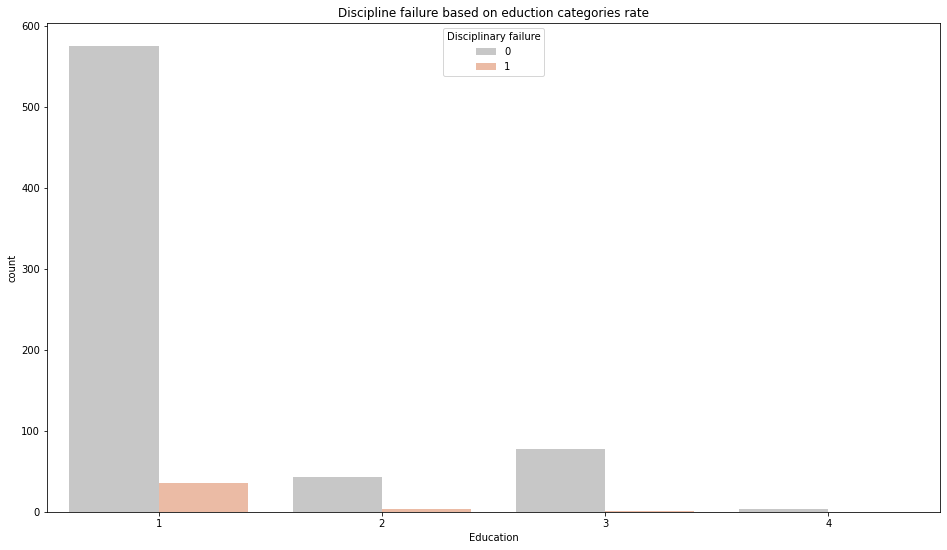

In [ ]:
plt.figure(figsize=(16,9))
sb.countplot(x='Education',hue='Disciplinary failure',data=df,palette='RdGy_r')
plt.title('Discipline failure based on eduction categories rate')
plt.show()

From the above figure we can see the graph of **Eduction vs Disciplinary failure** 
* Eduction Type 1 is having the highest Disciplinary failure among other Eduction Type

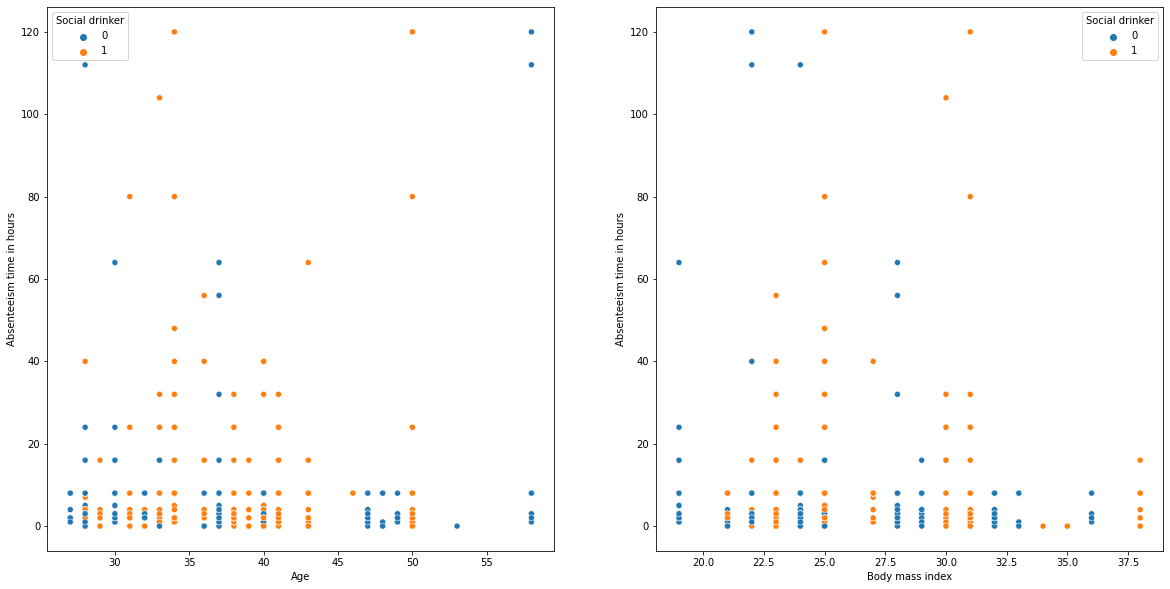

In [ ]:
columns1= ['Age', 'Body mass index']  
plt.subplots(figsize=(20, 10))
for i, col in enumerate(columns1):
    plt.subplot(1, 2, i + 1)
    sb.scatterplot(data=df, x=col,y='Absenteeism time in hours',hue='Social drinker')
plt.show()

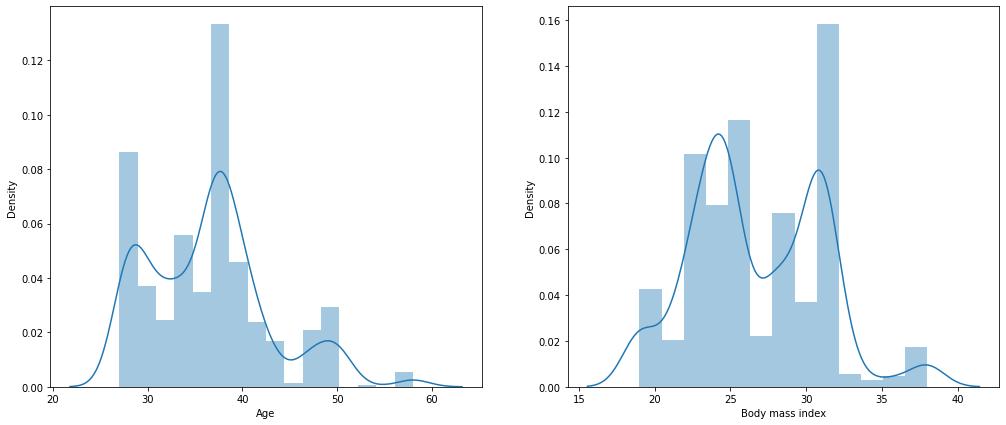

In [ ]:
a= ['Age','Body mass index']  
plt.subplots(figsize=(17, 7))
for i, col in enumerate(a):
    plt.subplot(1, 2, i + 1)
    sb.distplot(df[col])
plt.show()

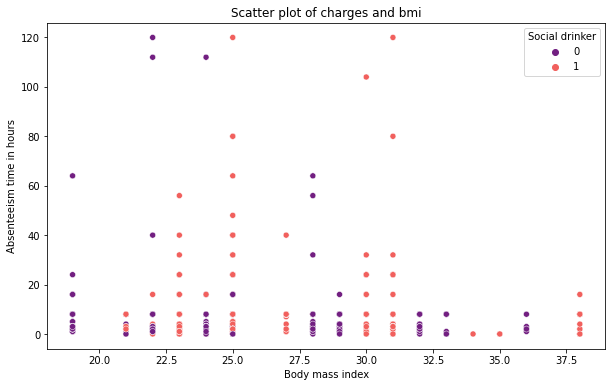

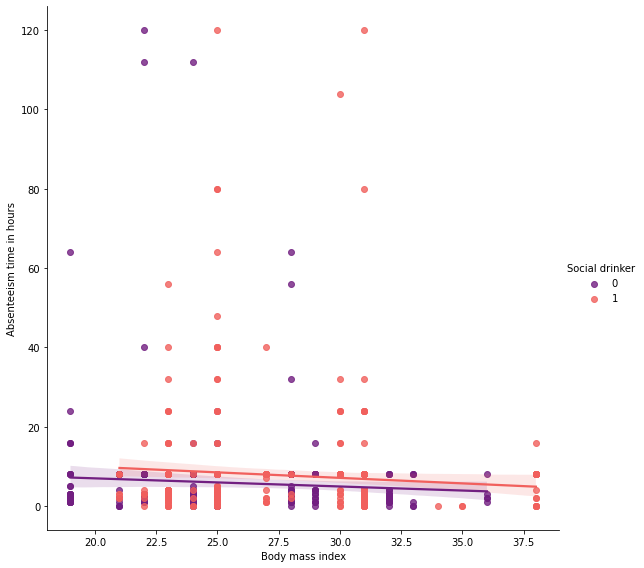

In [ ]:
#charges vs smoker vs bmi
plt.figure(figsize=(10,6))
ax = sb.scatterplot(x='Body mass index',y='Absenteeism time in hours',data=df,palette='magma',hue='Social drinker')
ax.set_title('Scatter plot of charges and bmi')

sb.lmplot(x='Body mass index', y='Absenteeism time in hours', hue="Social drinker", data=df, palette = 'magma', size = 8)

In [ ]:
df

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8
736,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4
737,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
738,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0


# **Feature Engineering**

11


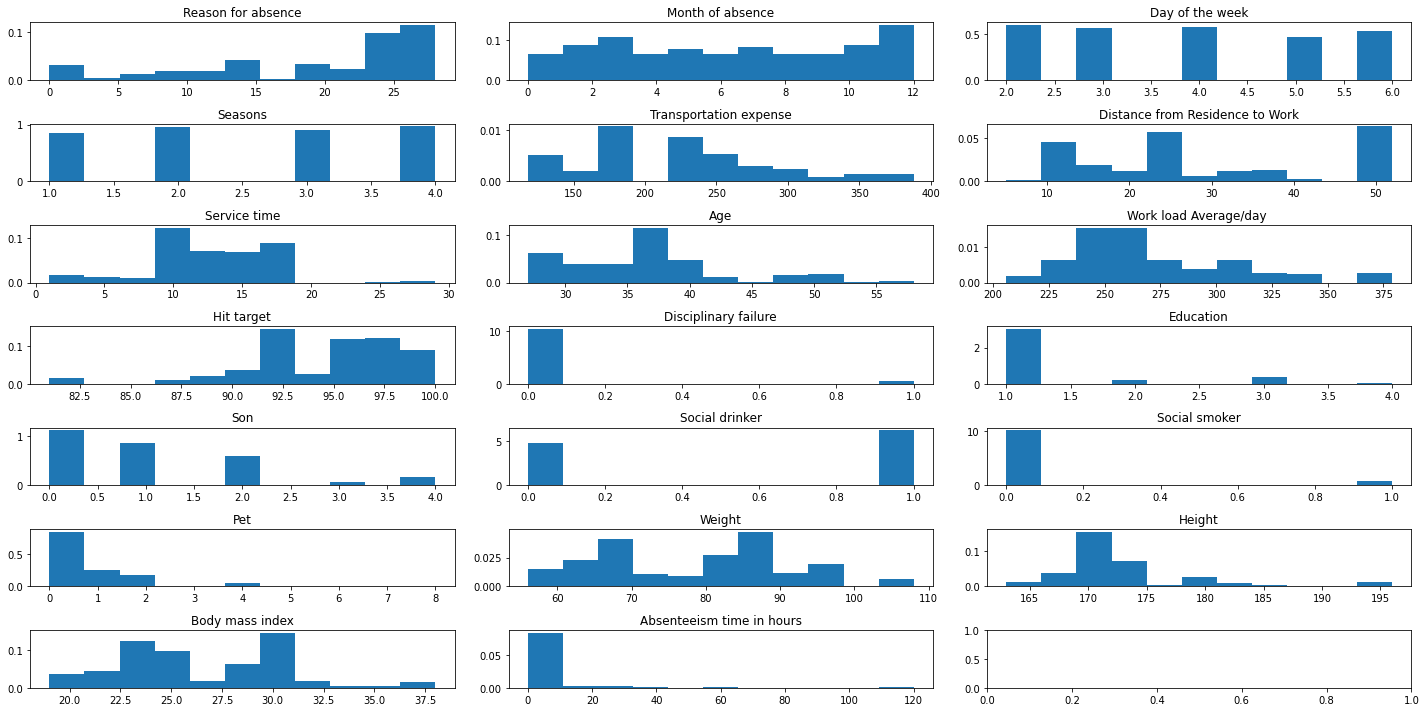

In [ ]:
# Histogram for all numeric cols
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = df.select_dtypes(include=numerics)
numeric_cols=new_df.columns
num_cols=3

#To decide on the bin size using Sturge’s rule
#bins=1+ceil(log2(n)) #research
  
bin_count = int(np.ceil(np.log2(len(new_df.axes[0]))) + 1)
n_bins = bin_count
print(n_bins)

# compute number of rows for plot 
num_rows= int(len(numeric_cols)/num_cols)+1
# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,10))
# plotting the numerical columns
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
 ax.hist(new_df[col],bins=n_bins,density=True)
 ax.set_title(col)
plt.show()

**The data is not normally distributed we can use the Normalization Scaling of MinMaxScaler**

In [ ]:
#Feature Scaling
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df.to_numpy()),columns=df.columns)

In [ ]:
scaled_df

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0.928571,0.583333,0.25,0.000000,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.000000,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.033333
1,0.000000,0.583333,0.25,0.000000,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1.0,0.000000,0.25,1.0,0.0,0.000,0.807692,0.454545,0.631579,0.000000
2,0.821429,0.583333,0.50,0.000000,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,0.000000,0.00,1.0,0.0,0.000,0.634615,0.212121,0.631579,0.016667
3,0.250000,0.583333,0.75,0.000000,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.0,0.000000,0.50,1.0,1.0,0.000,0.230769,0.151515,0.263158,0.033333
4,0.821429,0.583333,0.75,0.000000,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.000000,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.016667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.500000,0.583333,0.25,0.000000,0.633333,0.659574,0.428571,0.193548,0.339296,0.631579,0.0,0.000000,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.066667
736,0.392857,0.583333,0.25,0.000000,0.433333,0.127660,0.464286,0.322581,0.339296,0.631579,0.0,0.666667,0.25,0.0,0.0,0.125,0.615385,0.272727,0.526316,0.033333
737,0.000000,0.000000,0.25,0.000000,0.000000,0.191489,0.428571,0.419355,0.377540,0.736842,0.0,0.000000,0.25,1.0,0.0,1.000,0.807692,0.212121,0.789474,0.000000
738,0.000000,0.000000,0.50,0.333333,0.418519,0.638298,0.464286,0.387097,0.377540,0.736842,0.0,0.000000,0.50,1.0,0.0,0.250,0.846154,0.212121,0.842105,0.000000


# **Dimensioned reduction algorithms**

 **Principal Component Analysis (PCA)**

In [ ]:
# here we are taking teh all features for PCA
X=scaled_df.copy()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# PCA
pca=PCA(n_components=2)
df_r=pca.fit(X).transform(X)
explained_variance = pca.explained_variance_ratio_
explained_variance 

array([0.22278234, 0.12283922])

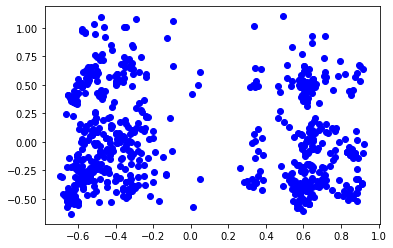

In [ ]:

plt.scatter(df_r[:,0], df_r[:,1],c='blue')
plt.show()

PCA:-

we can see the cluster formation of with PCA Dimesional redused algorithm 

# **Model Building**

## **k-Means without redused dimensions**

In [ ]:
from sklearn.cluster import KMeans

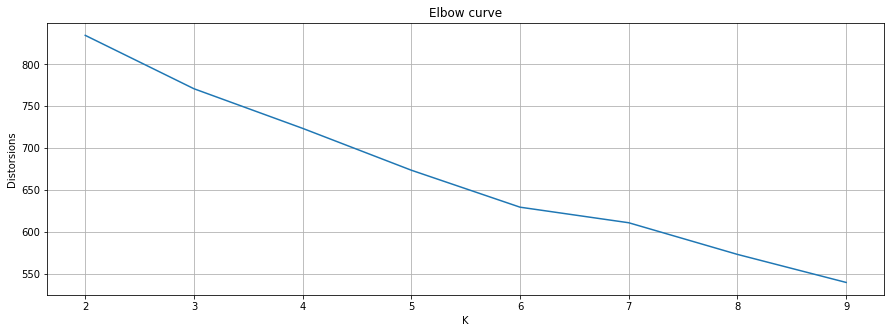

In [ ]:
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_df)

    silhouette_avg = silhouette_score(df, cluster_labels) # silhoutte score
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.03991256082126005
For n_clusters = 3 The average silhouette_score is : 0.1163515496126651
For n_clusters = 4 The average silhouette_score is : 0.08562405119032516
For n_clusters = 5 The average silhouette_score is : 0.08013505851967931
For n_clusters = 6 The average silhouette_score is : -0.02149140667953919
For n_clusters = 7 The average silhouette_score is : -0.005844044871192499
For n_clusters = 8 The average silhouette_score is : 0.04293741900718366
For n_clusters = 9 The average silhouette_score is : -0.0324954239935968
For n_clusters = 10 The average silhouette_score is : -0.00796274871679438
For n_clusters = 11 The average silhouette_score is : -0.059065278217286465
For n_clusters = 12 The average silhouette_score is : -0.051654616731213354
For n_clusters = 13 The average silhouette_score is : -0.0500215714034028
For n_clusters = 14 The average silhouette_score is : -0.05273788088968908
For n_clusters = 15 The average silhou

we can observe the above observations n_clusters = 3 and silhouette score =0.1163

In [ ]:
Kmeans1=KMeans(n_clusters=3)
Kmeans1.fit(scaled_df)

KMeans(n_clusters=3)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
Kmeans_O_s=silhouette_score(scaled_df,Kmeans1.labels_)
print('silhouette score of orginal data   ===>',Kmeans_O_s)

silhouette score of orginal data   ===> 0.1707420980394835


# **Kmeans Algorithm with reducing dimensions of PCA**

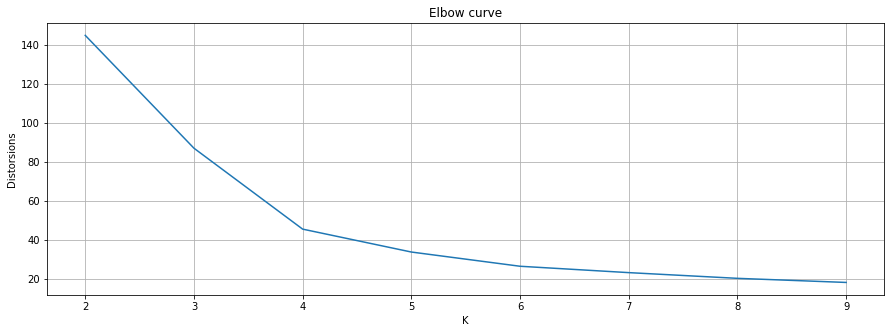

In [ ]:
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_r)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

We can see in the Elbow curve at the k --4 distance of the Elbow curve is suddenly decreasing we can say from the graph from k-distance-4 is onwards the error is constant  we can take n_clusters =4

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_r)

    silhouette_avg = silhouette_score(df, cluster_labels) # silhoutte score
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.04273506267636327
For n_clusters = 3 The average silhouette_score is : 0.016645550016857424
For n_clusters = 4 The average silhouette_score is : -0.03052254001165086
For n_clusters = 5 The average silhouette_score is : -0.032374378733005374
For n_clusters = 6 The average silhouette_score is : -0.042300423587423634
For n_clusters = 7 The average silhouette_score is : -0.05869575849317028
For n_clusters = 8 The average silhouette_score is : -0.0532200416457886
For n_clusters = 9 The average silhouette_score is : -0.08888360222750376
For n_clusters = 10 The average silhouette_score is : -0.09870530819954515
For n_clusters = 11 The average silhouette_score is : -0.10384015383017578
For n_clusters = 12 The average silhouette_score is : -0.1254614323106661
For n_clusters = 13 The average silhouette_score is : -0.12171000078288319
For n_clusters = 14 The average silhouette_score is : -0.20254721288917363
For n_clusters = 15 The average si

we can see in the above observations of silhouette score with respect to the n_clusters 

* For n_clusters = 2 The average silhouette_score is : 0.04273506267636327

In [ ]:
#Model building
Kmeans_pca_r = KMeans(n_clusters=2)
Kmeans_pca_r.fit(df_r)

KMeans(n_clusters=2)

In [ ]:
K_Means_R_PCA=silhouette_score(df_r,Kmeans_pca_r.labels_)
print('silhouette score  ===> ',K_Means_R_PCA)

silhouette score  ===>  0.5729915975723342


Text(0.5, 1.0, 'PCA')

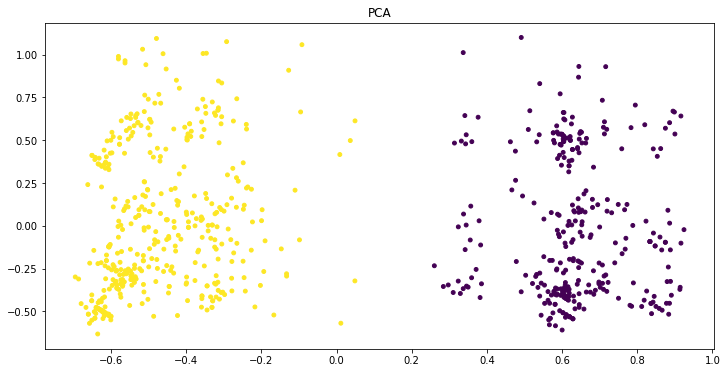

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df_r[:,0],df_r[:,1],c=Kmeans_pca_r.labels_,s=15)
plt.title("PCA")

here we can see the two cluster formation from kMeans  with PCA Dimension redused 

* The two cluster are both are sensitive to the outliers and we are not able to detect the outliers with kmeans algorithm  

* kmeans algorithm is not able to detect the outliers 

* kmeans algorithm is distributed clusters in equal size


In [ ]:
# Silhouette scores:
print("Origial Silhouette score =",Kmeans_O_s)
print("Reduction Silhouette score(PCA) =",K_Means_R_PCA)

Origial Silhouette score = 0.1707420980394835
Reduction Silhouette score(PCA) = 0.5729915975723342


# **Agglomerative Hierarchical algorithm**

### **Apply an Agglomerative Hierarchical algorithm without reduced dimensions of Orginal data**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

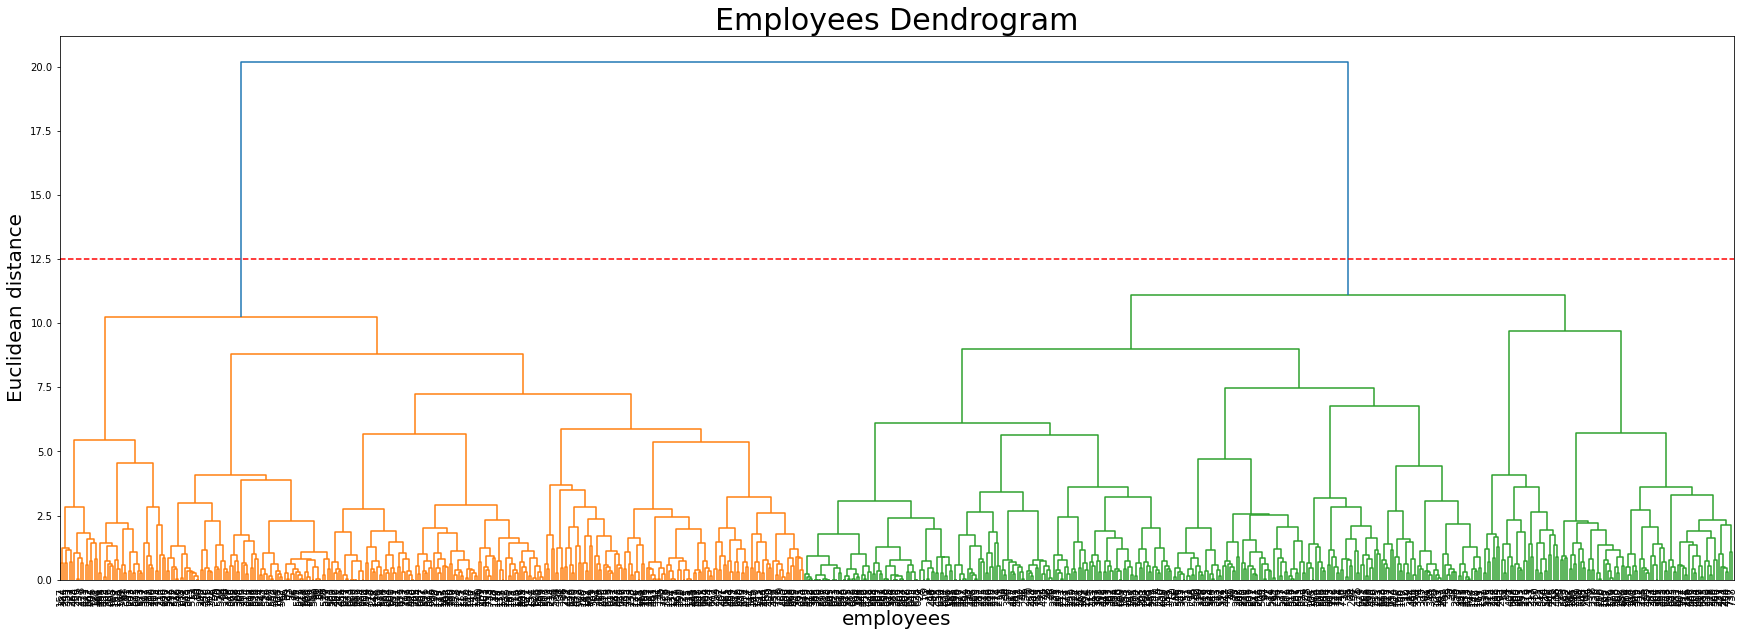

In [ ]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(scaled_df, method = 'ward'),labels=scaled_df.index)# scipy cluster
plt.axhline(y=12.5, color='r', linestyle='--') # for cuuting line
ax = plt.gca()# use to create current polar axis on current figure
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Employees Dendrogram',fontsize=30)
plt.xlabel('employees',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

**here i am giving the threshhold value is 12.5**

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with the maximum distance is the blue line and hence we can decide a threshold of 12.5 and cut the dendrogram:

* **In our case, it's 2. So let's fit the Agglomerative model with  2 clusters.**
* n_clusters=2

In [ ]:
# Model building
HC = AgglomerativeClustering(n_clusters=2)
HC.fit(scaled_df)

AgglomerativeClustering()

In [ ]:
Hc_O_S=silhouette_score(scaled_df,HC.labels_)
print('without redused  dimensions silhouette scotre ===>',Hc_O_S)

without redused  dimensions silhouette scotre ===> 0.19795516707635724


Apply an Agglomerative Hierarchical algorithm with redused dimensions of PCA 

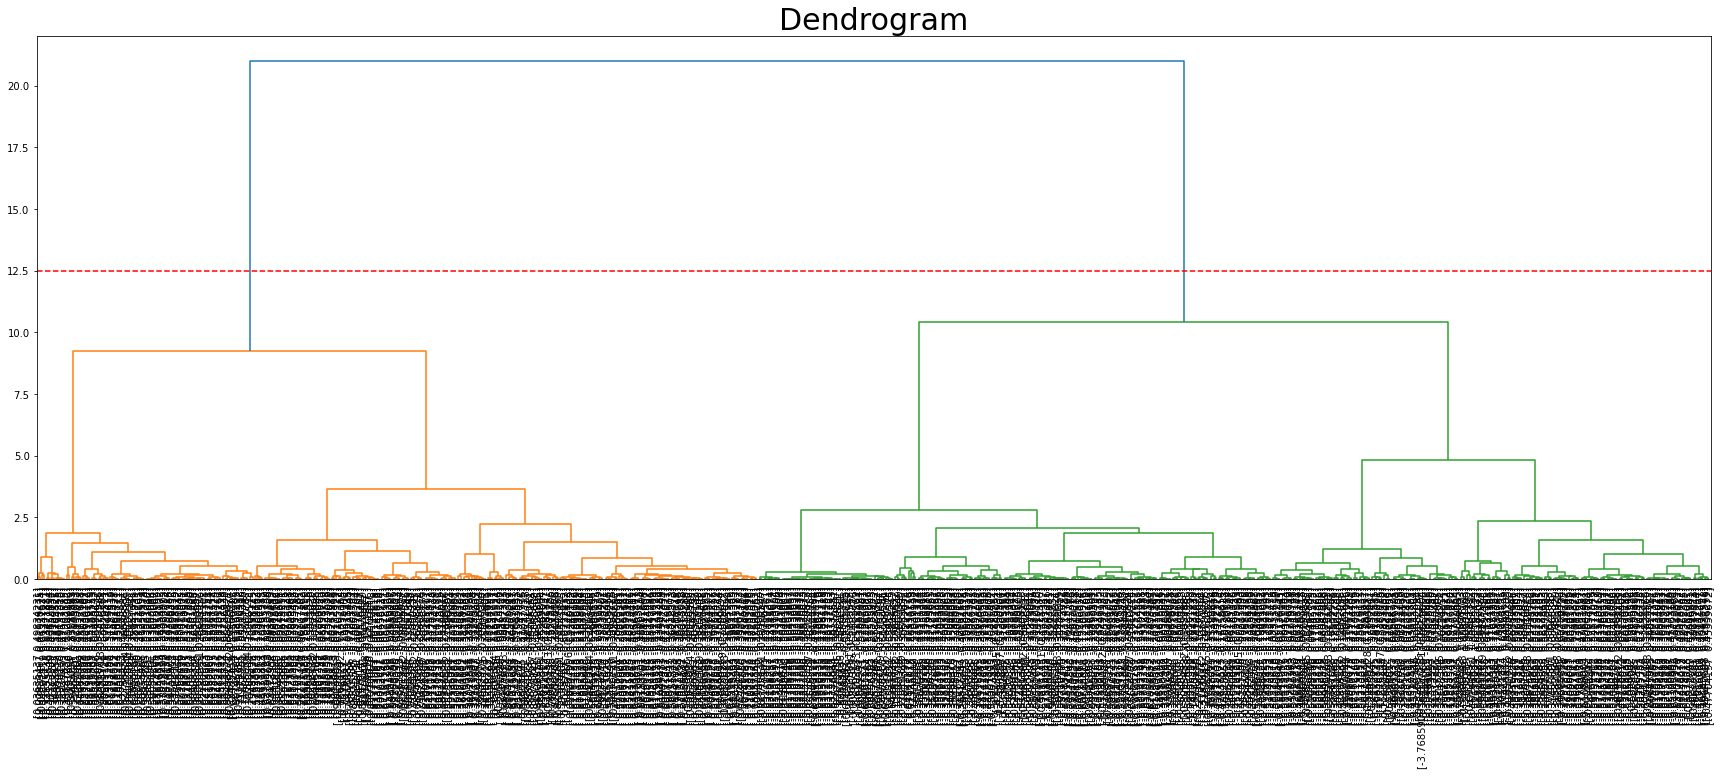

In [ ]:
# PCA
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(df_r, method = 'ward'),labels=df_r)
plt.axhline(y=12.5, color='r', linestyle='--')
ax = plt.gca()# used to create current polar axis on current figure
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram',fontsize=30)
plt.show()


In [ ]:
# Model Building
HC_r_pca = AgglomerativeClustering(n_clusters=2)
HC_r_pca.fit(df_r)

AgglomerativeClustering(n_clusters=4)

In [ ]:
Hc_R_S=silhouette_score(df_r,HC_r_pca.labels_)
print('silhouette score of redused dimesioned data  ===> ',Hc_R_S)

silhouette score of redused dimesioned data  ===>  0.5562861009564087


# DBSCAN For Whole Data

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh_w = NearestNeighbors(n_neighbors=2)
nbrs_w = neigh_w.fit(scaled_df)
distances_w, indices_w = nbrs_w.kneighbors(scaled_df)

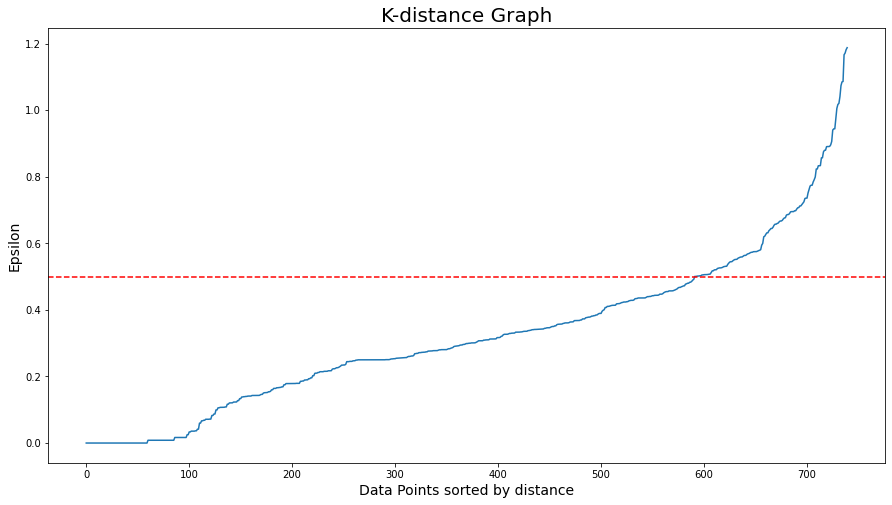

In [ ]:
# Plotting K-distance Graph
distances_w = np.sort(distances_w, axis=0)
distances_w = distances_w[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances_w)
plt.axhline(y=0.5,color='r',linestyle='--')
plt.title('K-distance Graph',fontsize=20)        
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
for i in [0.3,0.4,0.5,0.6,0.7,0.8]:
    for j in range(5,21):
        clusterer_w = DBSCAN(eps=i, min_samples=j)
        cluster_labels_w = clusterer_w.fit_predict(scaled_df)
        sil_score_w=silhouette_score(scaled_df, clusterer_w.labels_)
        print("eps = ",i,"| min_samples = ",j,' | Clusters = ',len(set(cluster_labels_w))," | Score = ",round(sil_score_w,3))
    print("-"*100)

eps =  0.3 | min_samples =  5  | Clusters =  14  | Score =  -0.196
eps =  0.3 | min_samples =  6  | Clusters =  12  | Score =  -0.227
eps =  0.3 | min_samples =  7  | Clusters =  6  | Score =  -0.197
eps =  0.3 | min_samples =  8  | Clusters =  4  | Score =  -0.182
eps =  0.3 | min_samples =  9  | Clusters =  3  | Score =  -0.161
eps =  0.3 | min_samples =  10  | Clusters =  3  | Score =  -0.161
eps =  0.3 | min_samples =  11  | Clusters =  2  | Score =  -0.037
eps =  0.3 | min_samples =  12  | Clusters =  2  | Score =  -0.042
eps =  0.3 | min_samples =  13  | Clusters =  2  | Score =  -0.042
eps =  0.3 | min_samples =  14  | Clusters =  2  | Score =  -0.042
eps =  0.3 | min_samples =  15  | Clusters =  2  | Score =  -0.042
eps =  0.3 | min_samples =  16  | Clusters =  2  | Score =  -0.06
eps =  0.3 | min_samples =  17  | Clusters =  2  | Score =  -0.06
eps =  0.3 | min_samples =  18  | Clusters =  2  | Score =  -0.06
eps =  0.3 | min_samples =  19  | Clusters =  2  | Score =  -0.06
ep

Conclusion :
eps =  0.8 | min_samples =  7  | Clusters =  6  | Score =  0.151

In [ ]:
dbscan_hyper_w=DBSCAN(eps=0.8,min_samples=7)
dbscan_hyper_w.fit(scaled_df)

DBSCAN(eps=0.8, min_samples=7)

In [ ]:
print("Silhouette score value for whole data = ",round(silhouette_score(scaled_df,dbscan_hyper_w.labels_),2))

Silhouette score value for whole data =  0.15


### DBSCAN for Reduced Data

In [ ]:
neigh_r = NearestNeighbors(n_neighbors=2)
nbrs_r= neigh_r.fit(df_r)
distances_r, indices_r = nbrs_r.kneighbors(df_r)

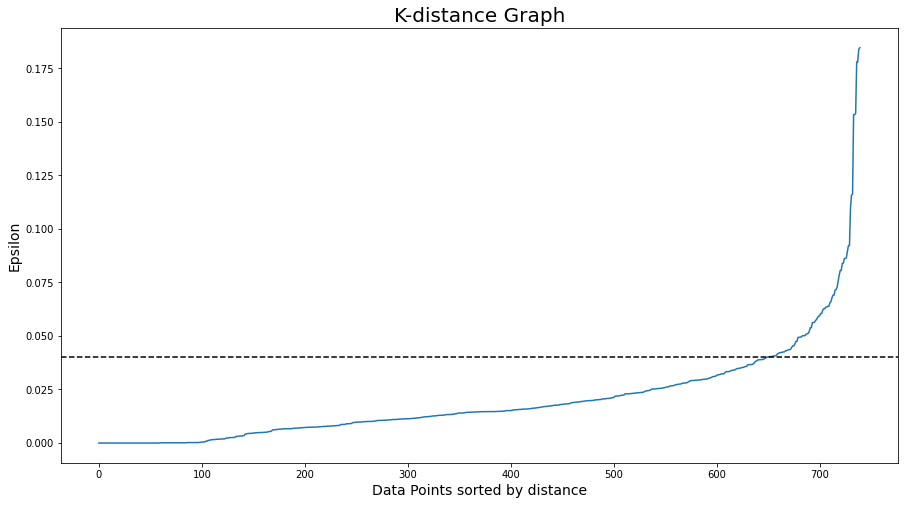

In [ ]:
# Plotting K-distance Graph
distances_r = np.sort(distances_r, axis=0)
distances_r = distances_r[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances_r)
plt.axhline(y=0.04,color='k',linestyle='--')
plt.title('K-distance Graph',fontsize=20)        
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [ ]:
for i in [0.03,0.04,0.05,0.06,0.07]:
    for j in range(1,11):
        clusterer_r = DBSCAN(eps=i, min_samples=j)
        cluster_labels_r = clusterer_r.fit_predict(df_r)
        sil_score_r=silhouette_score(df_r, clusterer_r.labels_)
        print("eps = ",i,"| min_samples = ",j,' | Clusters = ',len(set(cluster_labels_r))," | Score = ",round(sil_score_r,3))
    print("-"*100)

eps =  0.03 | min_samples =  1  | Clusters =  242  | Score =  0.201
eps =  0.03 | min_samples =  2  | Clusters =  95  | Score =  0.144
eps =  0.03 | min_samples =  3  | Clusters =  59  | Score =  0.056
eps =  0.03 | min_samples =  4  | Clusters =  46  | Score =  -0.008
eps =  0.03 | min_samples =  5  | Clusters =  28  | Score =  -0.148
eps =  0.03 | min_samples =  6  | Clusters =  17  | Score =  -0.196
eps =  0.03 | min_samples =  7  | Clusters =  12  | Score =  -0.269
eps =  0.03 | min_samples =  8  | Clusters =  8  | Score =  -0.306
eps =  0.03 | min_samples =  9  | Clusters =  7  | Score =  -0.318
eps =  0.03 | min_samples =  10  | Clusters =  7  | Score =  -0.329
----------------------------------------------------------------------------------------------------
eps =  0.04 | min_samples =  1  | Clusters =  150  | Score =  0.093
eps =  0.04 | min_samples =  2  | Clusters =  60  | Score =  0.115
eps =  0.04 | min_samples =  3  | Clusters =  42  | Score =  0.067
eps =  0.04 | min_sam

Conclusion :
eps =  0.07 | min_samples =  7  | Clusters =  9  | Score =  0.379

In [ ]:
dbscan_hyper_r=DBSCAN(eps=0.07,min_samples=7)
dbscan_hyper_r.fit(df_r)

DBSCAN(eps=0.07, min_samples=7)

In [ ]:
print("Silhouette score value for reduced data = ",round(silhouette_score(df_r,dbscan_hyper_r.labels_),2))

Silhouette score value for reduced data =  0.38


Text(0.5, 1.0, 'PCA')

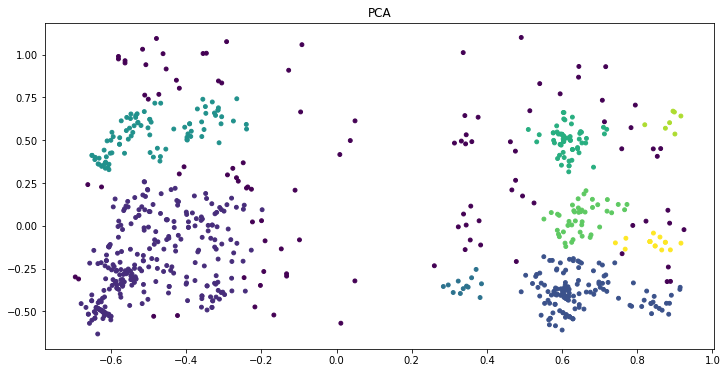

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df_r[:,0],df_r[:,1],c=dbscan_hyper_r.labels_,s=15)
plt.title("PCA")

# Final Conclusion

In [ ]:
final=pd.DataFrame()
final['']=['Score','Clusters']
final['KMeans_Whole_Data']=[round(Kmeans_O_s,2),3]
final['KMeans_Reduced_Data']=[round(K_Means_R_PCA,2),2]
final['Agglomerative_Whole_Data']=[round(Hc_O_S,2),2]
final['Agglomerative_Reduced_Data']=[round(Hc_R_S,2),2]
final['DBSCAN_Whole_Data']=[round(silhouette_score(scaled_df,dbscan_hyper_w.labels_),2),6]
final['DBSCAN_Reduced_Data']=[round(silhouette_score(df_r,dbscan_hyper_r.labels_),2),9]
final

,,KMeans_Whole_Data,KMeans_Reduced_Data,Agglomerative_Whole_Data,Agglomerative_Reduced_Data,DBSCAN_Whole_Data,DBSCAN_Reduced_Data
0,Score,0.17,0.57,0.2,0.56,0.15,0.38
1,Clusters,3.00,2.00,2.0,2.00,6.00,9.00


* When Comparing Scores for all Algorithms with whole data
* Kmeans Algorithm got 0.17 score
* Agglomerative Algorithm got 0.2 silhouette score
* DBSCAN algorithm have 0.15 score
* So, comparing the above algorithms with respective reduced data scores. We can see that Agglomerative algorithm with reduced data have highest score.

* **Agglomerative is the best model .**